# **Notebook - Systemic Crisis prediction**

## Description

**Source** \
https://www.kaggle.com/datasets/chirin/africa-economic-banking-and-systemic-crisis-data

**Description** \
This dataset is originally from the Harvard Buisness School "BEHAVIORAL FINANCE & FINANCIAL STABILITY" data. The objective of the dataset is to diagnostically predict whether or not a systemic crisis will appear in a country, based on certain economical indicators included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all the countries are African countries and the data ranges from 1870 to 2023.

**Variables (n=12)**
* The year of the observation
* The exchange rate of the country vis-a-vis the USD
* Domestic debt
* Sovereign external debt
* The total debt in default vis-a-vis the GDP
* The annual CPI Inflation rate
* Independence
* Whether currency crisis occurred in the year
* Whether inflation crisis occurred in the year
* Whether banking crisis occurred in the year
* <u>The outcome: Whether systemic crisis occured in the year

## Import data

In [123]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import skew, norm, probplot, boxcox, f_oneway

import warnings
warnings.filterwarnings("ignore")

In [124]:
#Read dataset
df = pd.read_csv("../data/african_crises.csv")

In [125]:
#Delete useless rows
df = df.drop(columns=['case', 'cc3', 'country', 'banking_crisis'])

In [126]:
# Giving columns shorter names
df = df.rename(columns = {
    "domestic_debt_in_default": "domestic_debt",
    "sovereign_external_debt_default": "external_debt",
    "gdp_weighted_default": "gdp_weighted",
})

## Analyze data

### General exploration

In [127]:
# First 5 rows
df.head()

,year,systemic_crisis,exch_usd,domestic_debt,external_debt,gdp_weighted,inflation_annual_cpi,independence,currency_crises,inflation_crises
0,1870,1,0.052264,0,0,0.0,3.441456,0,0,0
1,1871,0,0.052798,0,0,0.0,14.149140,0,0,0
2,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0
3,1873,0,0.051680,0,0,0.0,11.203897,0,0,0
4,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0


In [128]:
#Last 5 rows
df.tail()

,year,systemic_crisis,exch_usd,domestic_debt,external_debt,gdp_weighted,inflation_annual_cpi,independence,currency_crises,inflation_crises
1054,2009,1,354.8,1,1,0.0,-7.670,1,1,0
1055,2010,0,378.2,1,1,0.0,3.217,1,0,0
1056,2011,0,361.9,1,1,0.0,4.920,1,0,0
1057,2012,0,361.9,1,1,0.0,3.720,1,0,0
1058,2013,0,361.9,1,1,0.0,1.632,1,0,0


In [129]:
#Find correlations
df.corr()

,year,systemic_crisis,exch_usd,domestic_debt,external_debt,gdp_weighted,inflation_annual_cpi,independence,currency_crises,inflation_crises
year,1.000000,0.197450,0.248757,0.136828,0.271890,-0.054670,0.037035,0.407360,0.189390,0.098630
systemic_crisis,0.197450,1.000000,0.202687,0.122158,0.249850,0.005274,0.106452,0.147083,0.112751,0.172562
exch_usd,0.248757,0.202687,1.000000,0.005253,0.422890,-0.040726,-0.011947,0.126034,-0.056472,-0.063783
domestic_debt,0.136828,0.122158,0.005253,1.000000,0.464751,-0.029874,0.151832,0.109120,0.227585,0.224429
external_debt,0.271890,0.249850,0.422890,0.464751,1.000000,0.345919,0.072609,0.228192,0.199428,0.187930
gdp_weighted,-0.054670,0.005274,-0.040726,-0.029874,0.345919,1.000000,-0.004535,0.078936,0.016970,0.017630
inflation_annual_cpi,0.037035,0.106452,-0.011947,0.151832,0.072609,-0.004535,1.000000,0.016569,0.076590,0.080060
independence,0.407360,0.147083,0.126034,0.109120,0.228192,0.078936,0.016569,1.000000,0.086376,-0.022548
currency_crises,0.189390,0.112751,-0.056472,0.227585,0.199428,0.016970,0.076590,0.086376,1.000000,0.393376
inflation_crises,0.098630,0.172562,-0.063783,0.224429,0.187930,0.017630,0.080060,-0.022548,0.393376,1.000000


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  1059 non-null   int64  
 1   systemic_crisis       1059 non-null   int64  
 2   exch_usd              1059 non-null   float64
 3   domestic_debt         1059 non-null   int64  
 4   external_debt         1059 non-null   int64  
 5   gdp_weighted          1059 non-null   float64
 6   inflation_annual_cpi  1059 non-null   float64
 7   independence          1059 non-null   int64  
 8   currency_crises       1059 non-null   int64  
 9   inflation_crises      1059 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 82.9 KB


In [131]:
df.describe()

,year,systemic_crisis,exch_usd,domestic_debt,external_debt,gdp_weighted,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


<b> We can see that systemic_crisis and banking_crisis have a high correlation - 0.853702. </b>\
This can actually be explained, since systemic crisis usually occcurs when multiple banks go bankrupt.

### Pearson's Correlation

In [132]:
df.corr()

,year,systemic_crisis,exch_usd,domestic_debt,external_debt,gdp_weighted,inflation_annual_cpi,independence,currency_crises,inflation_crises
year,1.000000,0.197450,0.248757,0.136828,0.271890,-0.054670,0.037035,0.407360,0.189390,0.098630
systemic_crisis,0.197450,1.000000,0.202687,0.122158,0.249850,0.005274,0.106452,0.147083,0.112751,0.172562
exch_usd,0.248757,0.202687,1.000000,0.005253,0.422890,-0.040726,-0.011947,0.126034,-0.056472,-0.063783
domestic_debt,0.136828,0.122158,0.005253,1.000000,0.464751,-0.029874,0.151832,0.109120,0.227585,0.224429
external_debt,0.271890,0.249850,0.422890,0.464751,1.000000,0.345919,0.072609,0.228192,0.199428,0.187930
gdp_weighted,-0.054670,0.005274,-0.040726,-0.029874,0.345919,1.000000,-0.004535,0.078936,0.016970,0.017630
inflation_annual_cpi,0.037035,0.106452,-0.011947,0.151832,0.072609,-0.004535,1.000000,0.016569,0.076590,0.080060
independence,0.407360,0.147083,0.126034,0.109120,0.228192,0.078936,0.016569,1.000000,0.086376,-0.022548
currency_crises,0.189390,0.112751,-0.056472,0.227585,0.199428,0.016970,0.076590,0.086376,1.000000,0.393376
inflation_crises,0.098630,0.172562,-0.063783,0.224429,0.187930,0.017630,0.080060,-0.022548,0.393376,1.000000


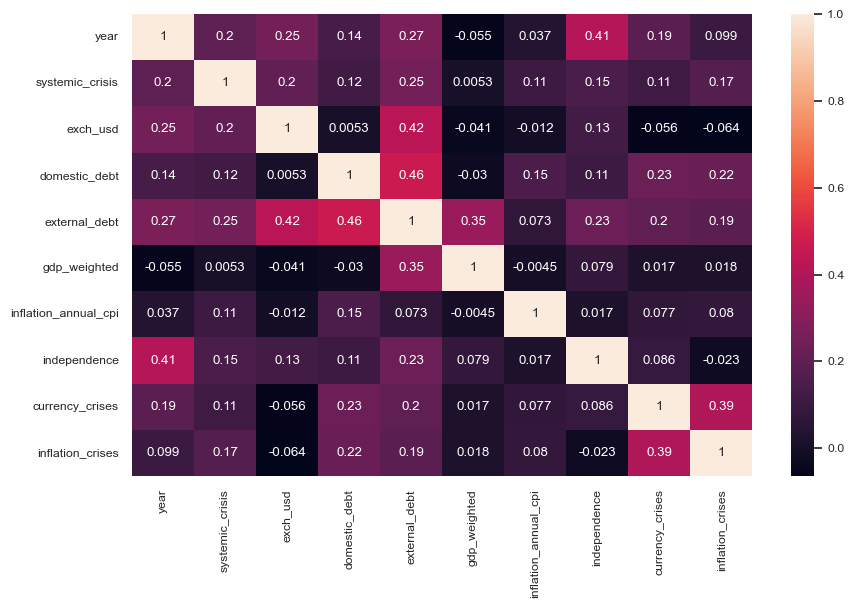

In [133]:
# Pearson's correlation (with heatmap)
plt.figure(figsize=(10,6))
sns.set(font_scale=0.8)
plt.rcParams["axes.labelsize"] = 0.5
sns.heatmap(df.corr(), annot=True);

### Phi K Correlation

In [134]:
# Import libraries
import phik
from phik import resources, report
from phik.report import plot_correlation_matrix

In [135]:
df.phik_matrix()

interval columns not set, guessing: ['year', 'systemic_crisis', 'exch_usd', 'domestic_debt', 'external_debt', 'gdp_weighted', 'inflation_annual_cpi', 'independence', 'currency_crises', 'inflation_crises']


,year,systemic_crisis,exch_usd,domestic_debt,external_debt,gdp_weighted,inflation_annual_cpi,independence,currency_crises,inflation_crises
year,1.000000,0.421927,0.441790,0.189083,0.531304,0.401267,0.000000,0.812338,0.327599,0.379579
systemic_crisis,0.421927,1.000000,0.392061,0.170234,0.372682,0.048303,0.059151,0.217482,0.071946,0.255574
exch_usd,0.441790,0.392061,1.000000,0.152233,0.586554,0.000000,0.000000,0.164333,0.000000,0.058890
domestic_debt,0.189083,0.170234,0.152233,1.000000,0.658024,0.000000,0.103045,0.154396,0.142807,0.331542
external_debt,0.531304,0.372682,0.586554,0.658024,1.000000,0.326063,0.000000,0.343229,0.120118,0.281289
gdp_weighted,0.401267,0.048303,0.000000,0.000000,0.326063,1.000000,0.000000,0.055706,0.175819,0.128280
inflation_annual_cpi,0.000000,0.059151,0.000000,0.103045,0.000000,0.000000,1.000000,0.000000,0.041555,0.022690
independence,0.812338,0.217482,0.164333,0.154396,0.343229,0.055706,0.000000,1.000000,0.045114,0.000000
currency_crises,0.327599,0.071946,0.000000,0.142807,0.120118,0.175819,0.041555,0.045114,1.000000,0.243260
inflation_crises,0.379579,0.255574,0.058890,0.331542,0.281289,0.128280,0.022690,0.000000,0.243260,1.000000


interval columns not set, guessing: ['year', 'systemic_crisis', 'exch_usd', 'domestic_debt', 'external_debt', 'gdp_weighted', 'inflation_annual_cpi', 'independence', 'currency_crises', 'inflation_crises']


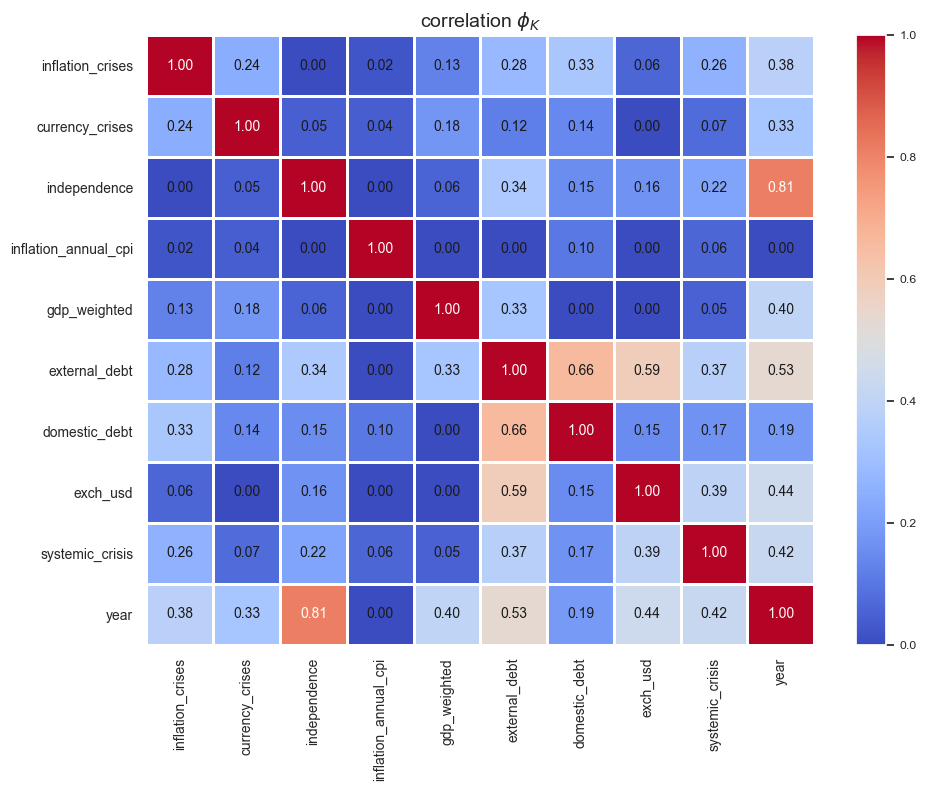

In [136]:
phik_overview = df.phik_matrix()
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="coolwarm", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(10, 8))
plt.tight_layout()

### Bivariate Analyses

Here I compare each variable with the outcome variable - **Systemic Crisis**. \
*I've decided to make just one cycle to visualize all plots instead of doing each one separately.*

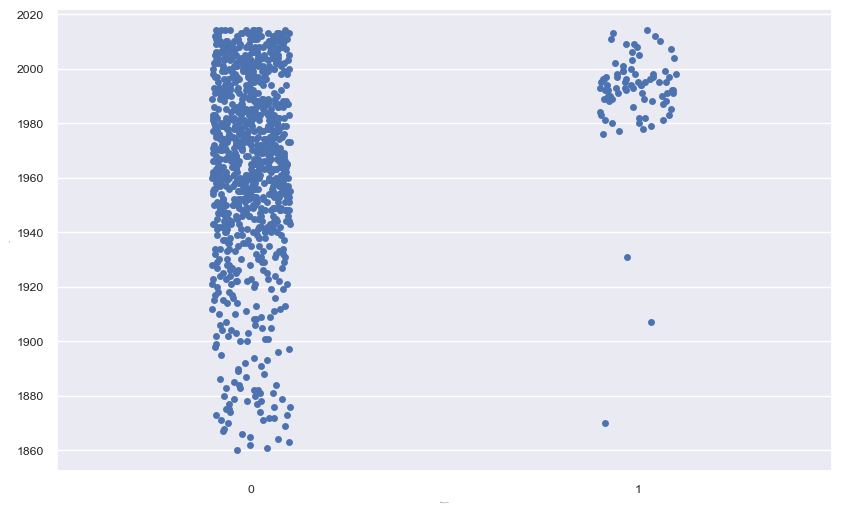

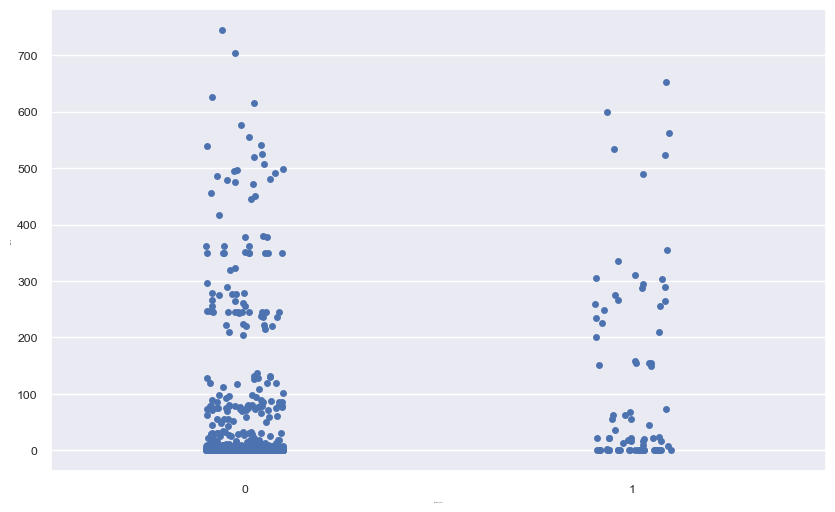

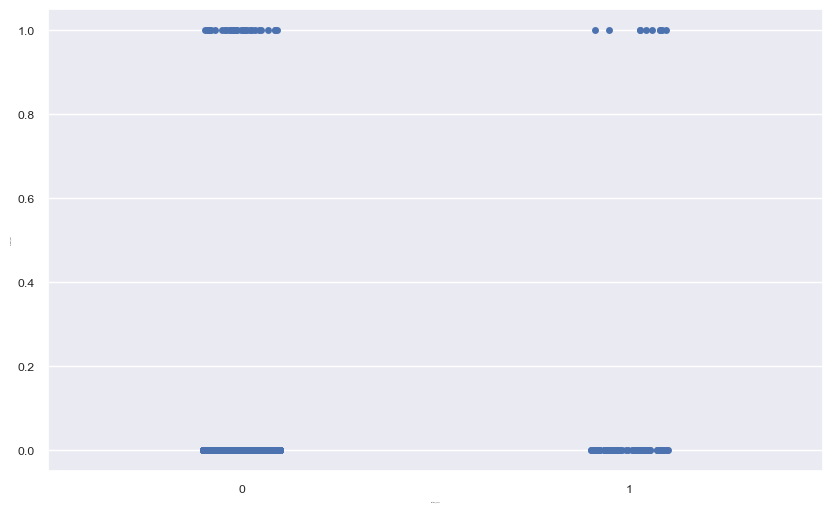

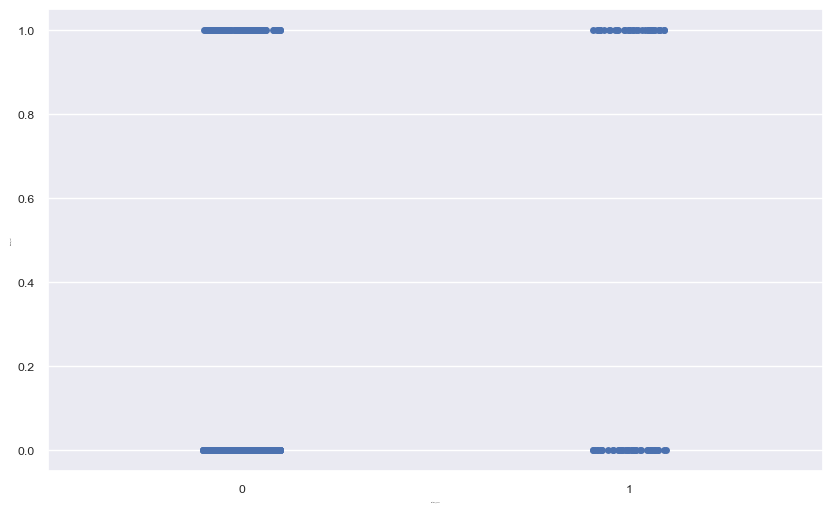

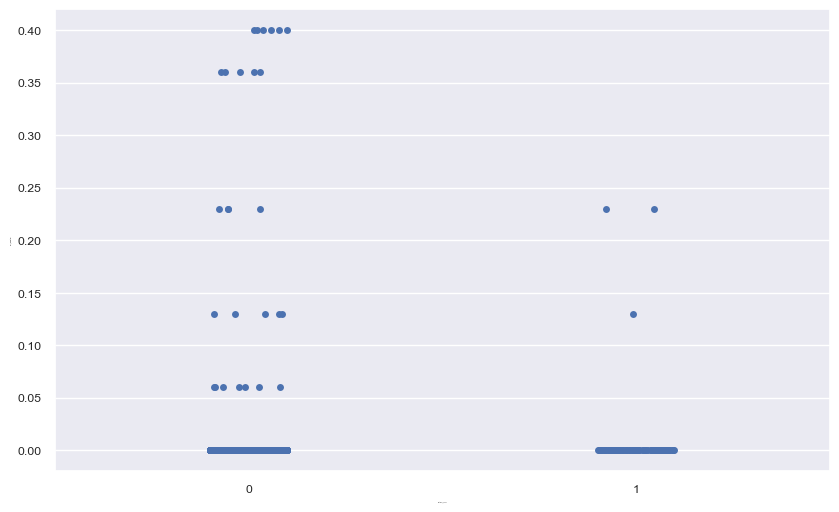

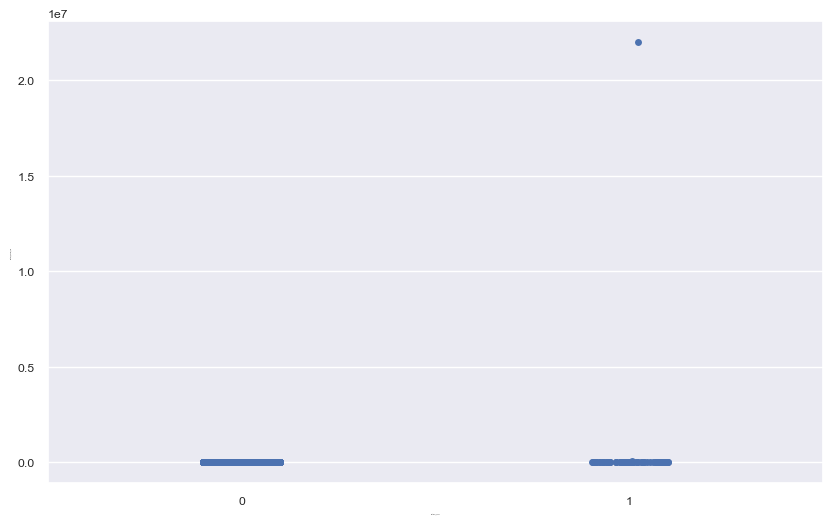

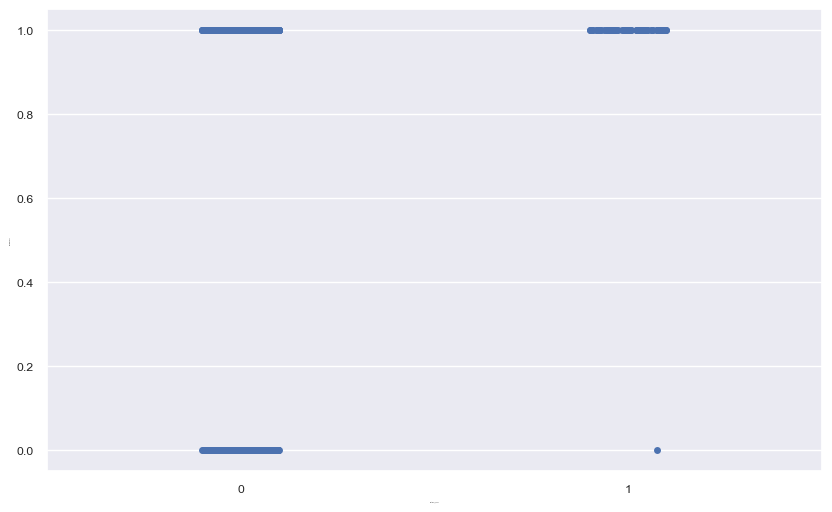

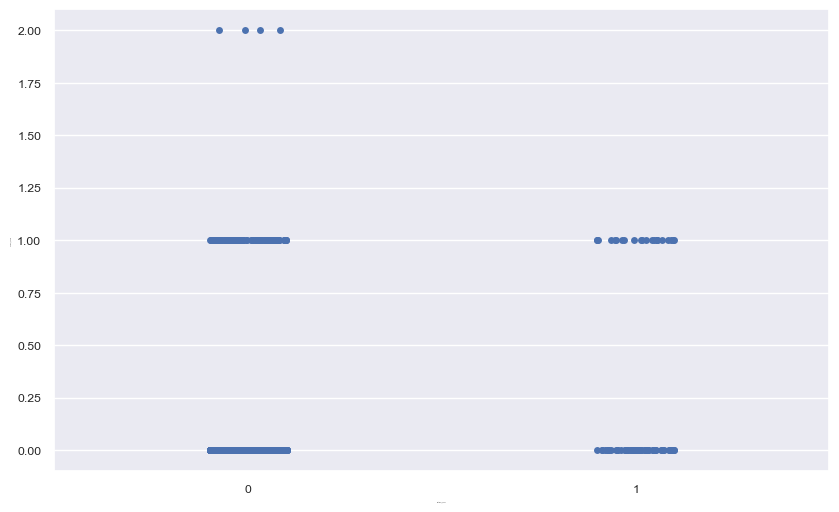

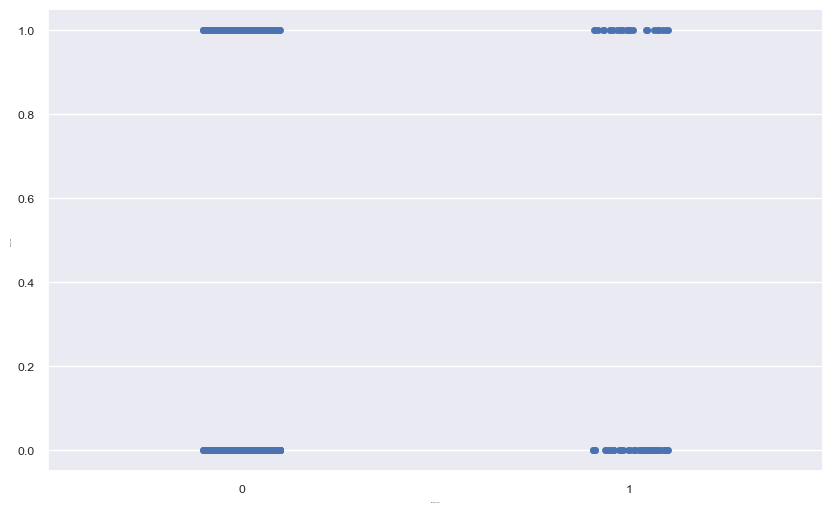

In [137]:
for column in df.columns:
    if column == "systemic_crisis":
        continue

    plt.figure(figsize=(10,6))
    sns.stripplot(data=df, x='systemic_crisis', y=column, jitter=True)
    plt.show()

As we can see **year**, **annual inflation**, **cpi** and **exchange rate** were found to be associated the most with systemic crises

## Supervised Machine Learning (Classification)

In [138]:
#Import more libraries
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from scipy.stats import stats, norm, skew
from sklearn import linear_model
from sklearn import metrics
from sklearn import datasets

In [139]:
data=df.copy()
X = data.drop('systemic_crisis', axis=1)
y = data['systemic_crisis'].astype('int64')
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(741, 9) (318, 9)


In [140]:
#Split dataest into to train and test sets
y = data['systemic_crisis'].astype('int64')
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(741, 9) (318, 9)


### Build the model using the Decision Tree Classifier

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [142]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [143]:
#  Function to calculate recall score
def get_recall_score(model):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

Recall on training set :  1.0
Recall on test set :  0.5517241379310345


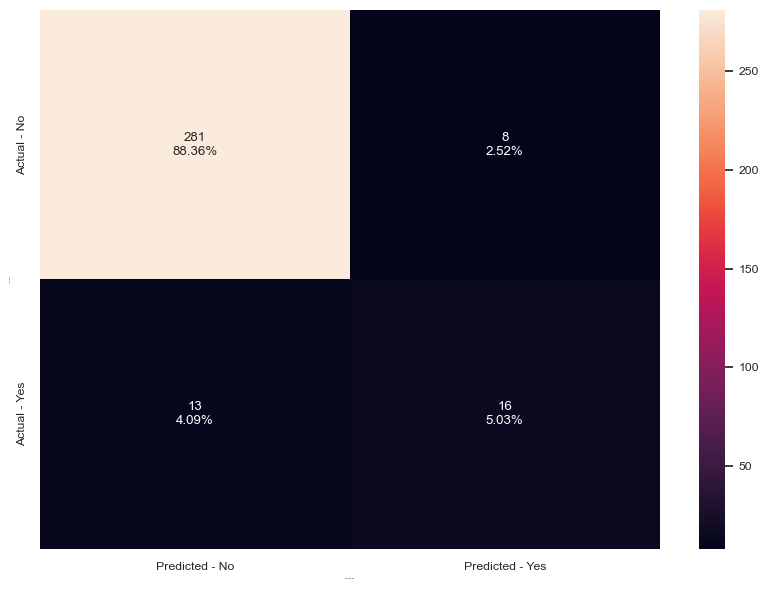

In [144]:
make_confusion_matrix(model,y_test)
get_recall_score(model)

In [145]:
column_names = list(df.columns)
column_names.remove('systemic_crisis')  # As this is the DV                
feature_names = column_names
print(feature_names)

['year', 'exch_usd', 'domestic_debt', 'external_debt', 'gdp_weighted', 'inflation_annual_cpi', 'independence', 'currency_crises', 'inflation_crises']


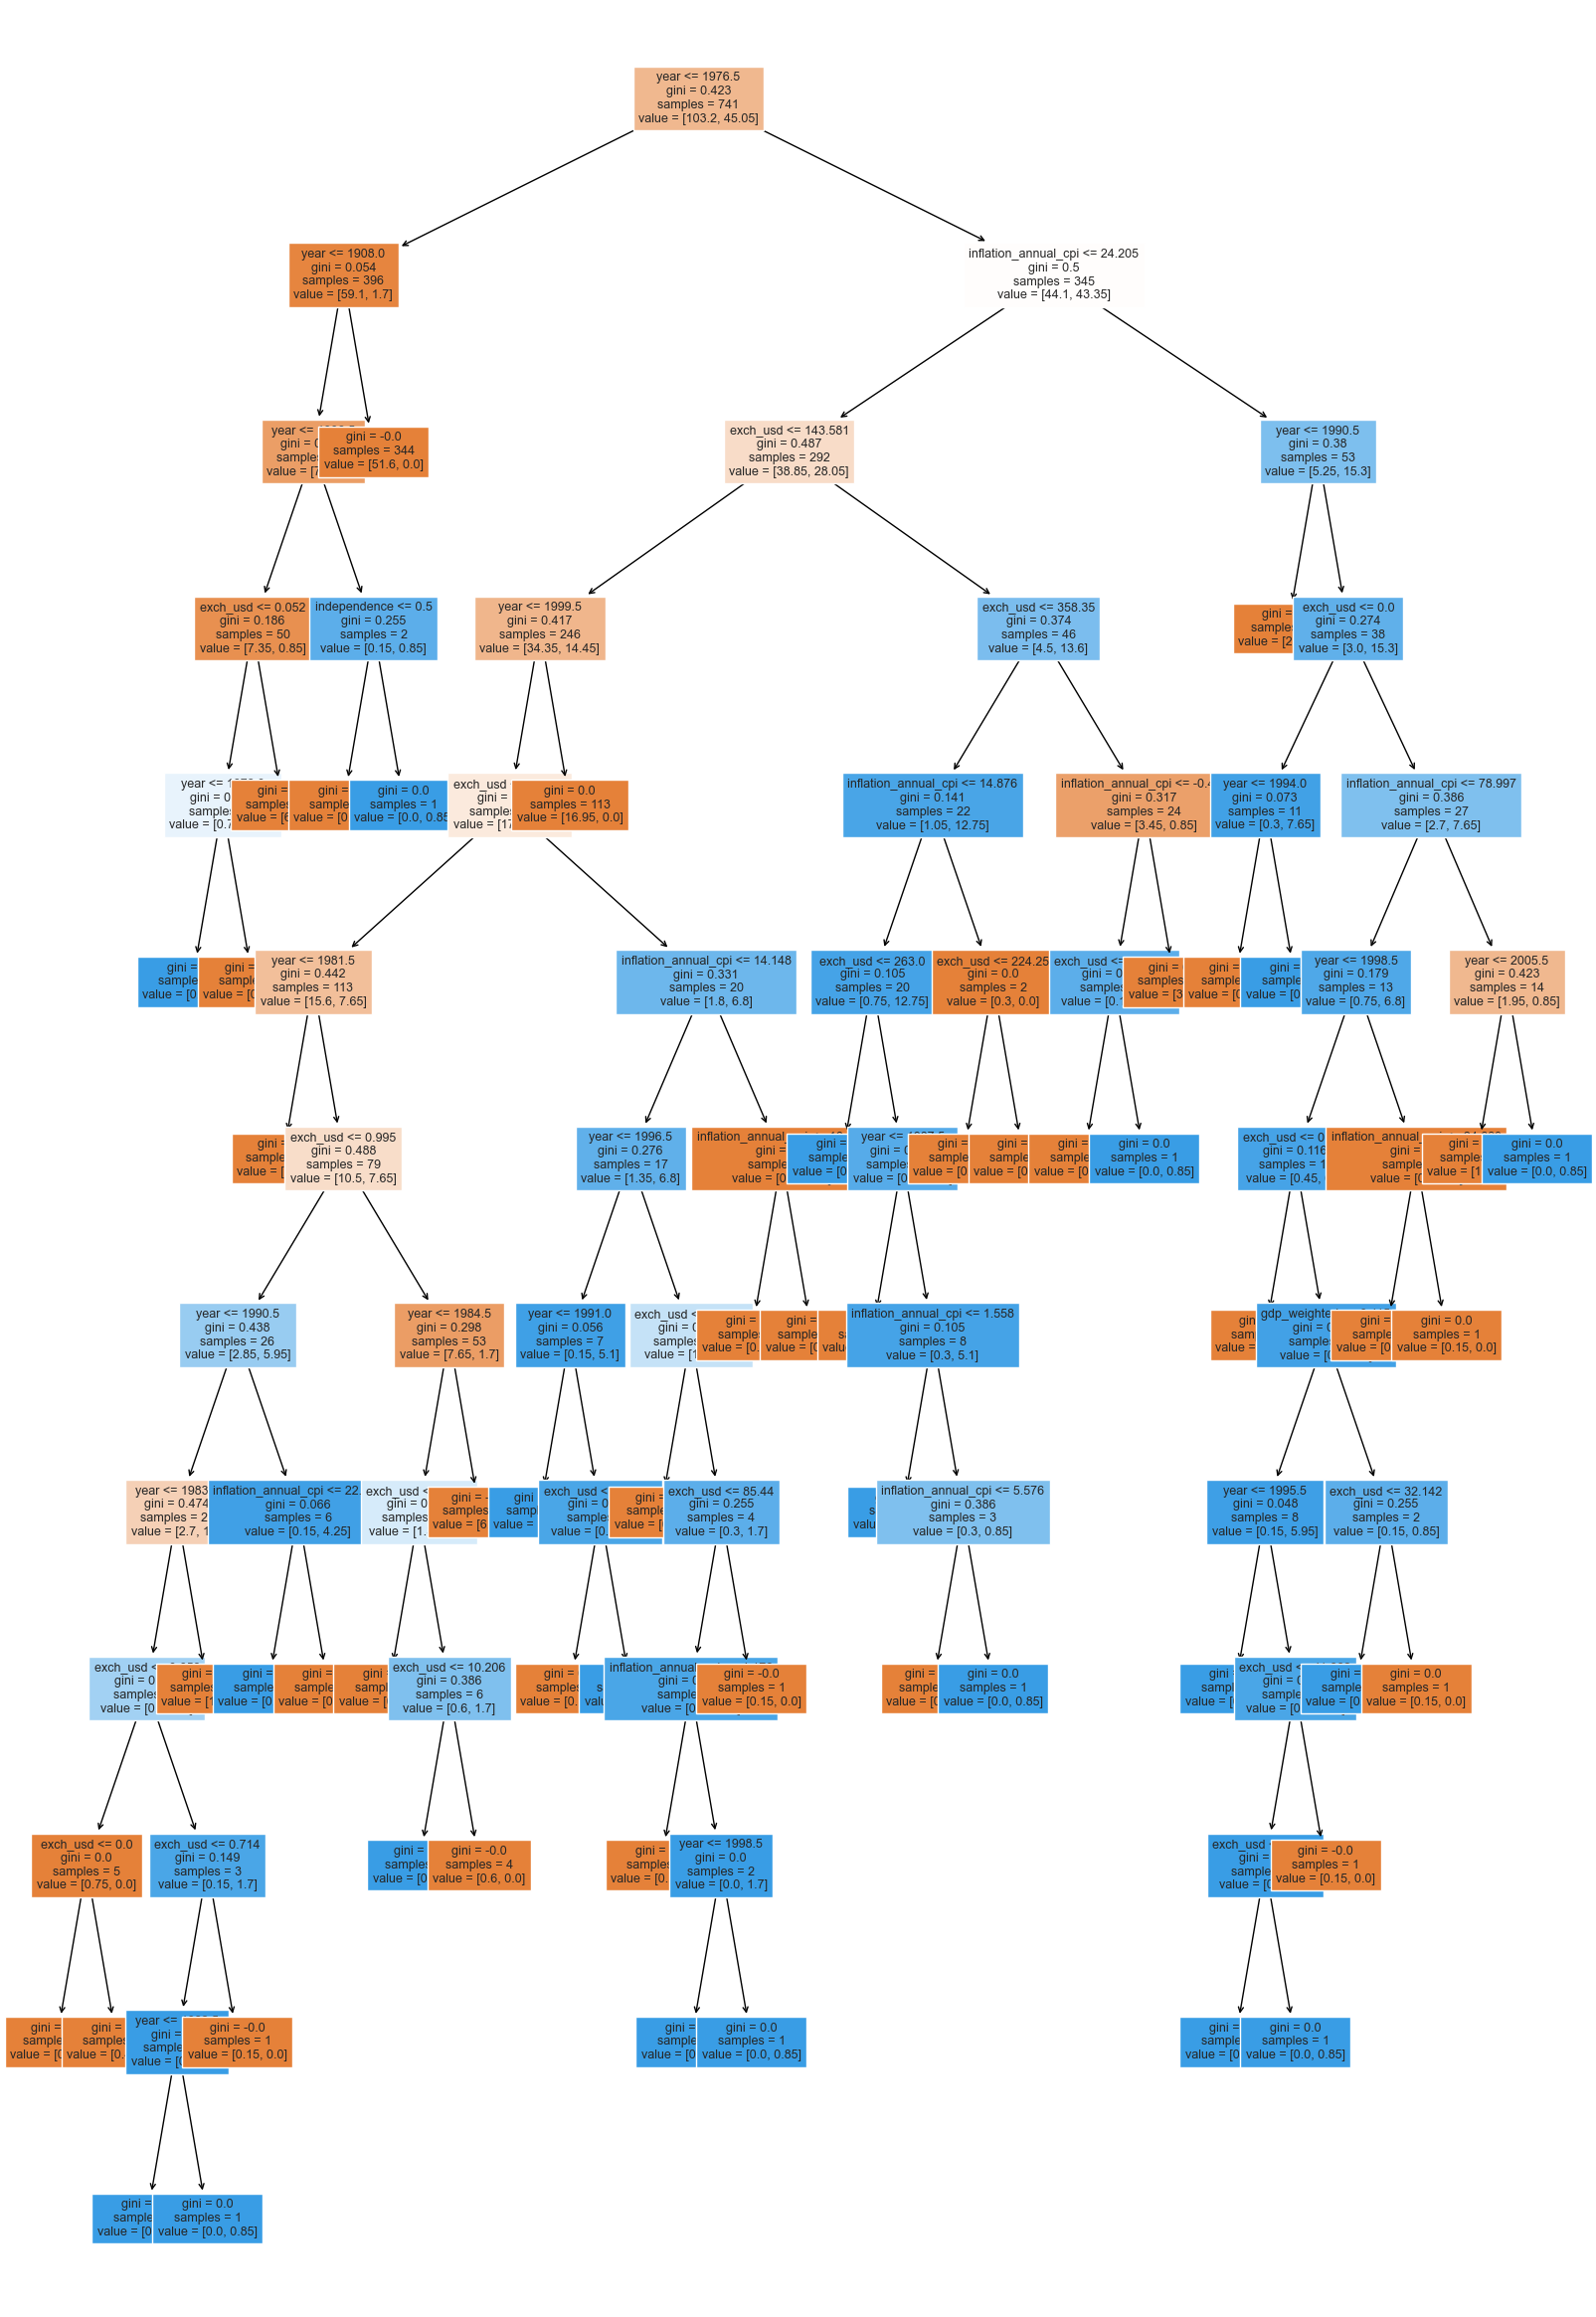

In [146]:
#Visuslize a desicion tree classifier
plt.figure(figsize=(20,30))
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [147]:
print(pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                           Imp
year                  0.542839
exch_usd              0.322870
inflation_annual_cpi  0.129794
independence          0.004066
gdp_weighted          0.000431
domestic_debt         0.000000
external_debt         0.000000
currency_crises       0.000000
inflation_crises      0.000000


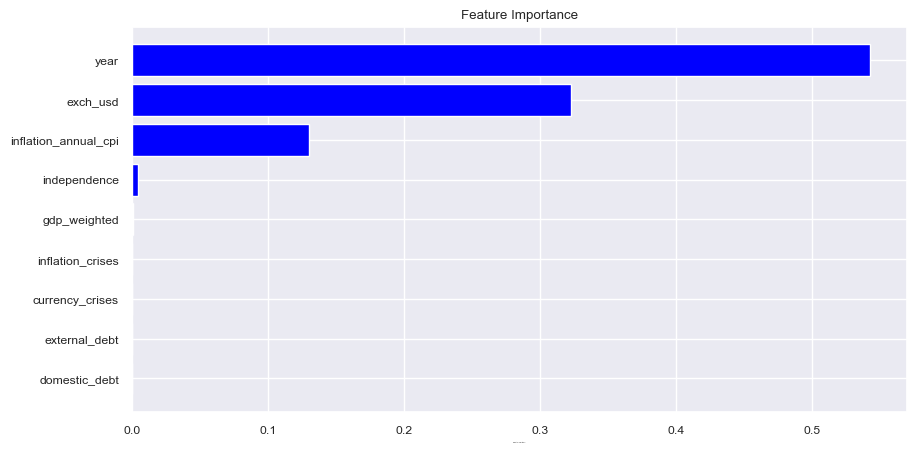

In [148]:
# Each feature importance
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Let's reduce overfitting by using Grid Search technique for hyperparameter tuning of the tree model

In [149]:
from sklearn.model_selection import GridSearchCV

In [150]:
# Choose the type of classifier
estimator = DecisionTreeClassifier(random_state=1,class_weight = {0:.15,1:.85})

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(15,27),
    'criterion': ['entropy','gini'],
    'splitter': ['best','random'],
    'min_impurity_decrease': [0.0001,0.001,0.001],
    'max_features': ['log2','sqrt']
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=17,
                       max_features='log2', min_impurity_decrease=0.0001,
                       random_state=1, splitter='random')

Recall on training set :  0.9811320754716981
Recall on test set :  0.6551724137931034


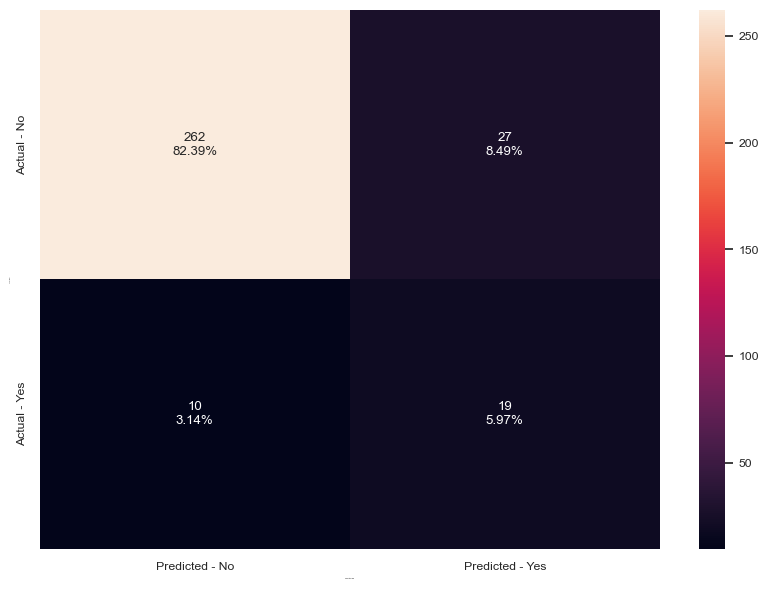

In [151]:
make_confusion_matrix(estimator,y_test)
get_recall_score(estimator)

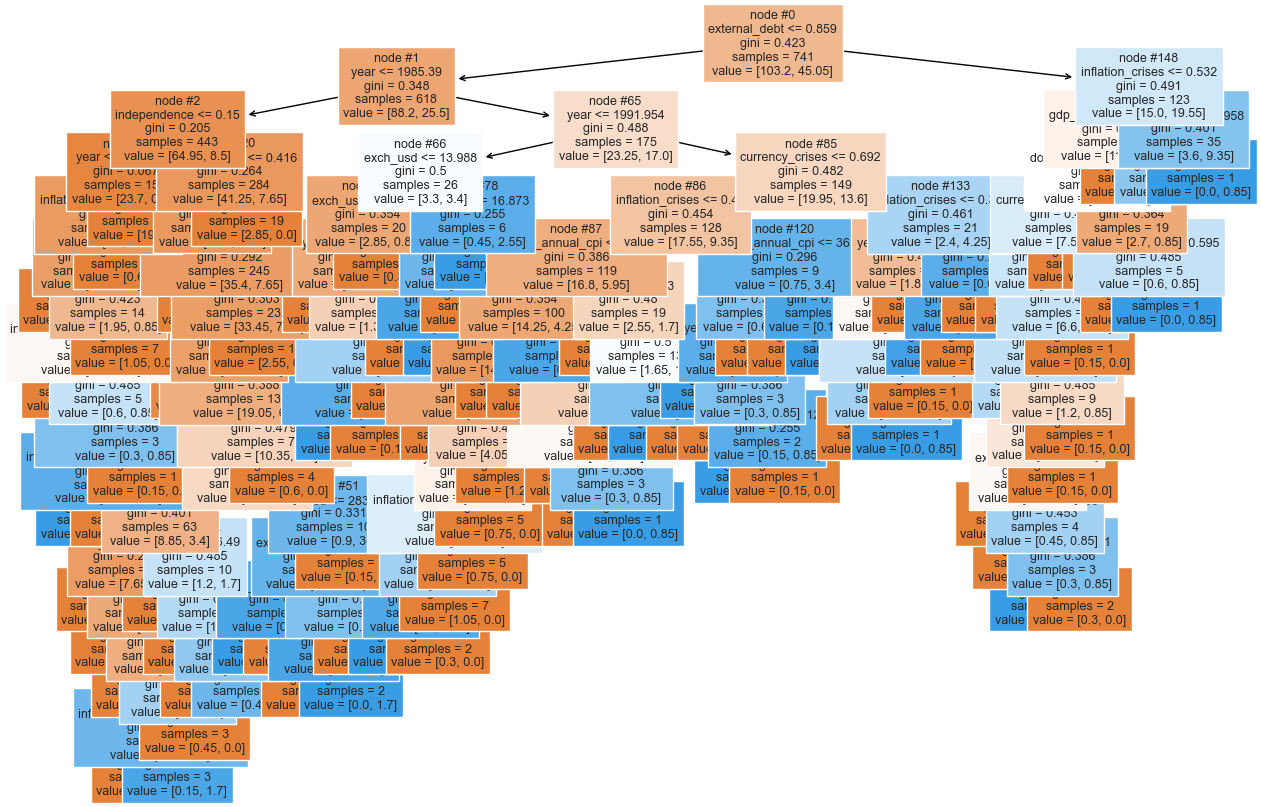

In [152]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

                           Imp
year                  0.288238
exch_usd              0.276358
inflation_annual_cpi  0.136900
external_debt         0.127986
inflation_crises      0.088459
currency_crises       0.045149
gdp_weighted          0.014790
domestic_debt         0.012080
independence          0.010041


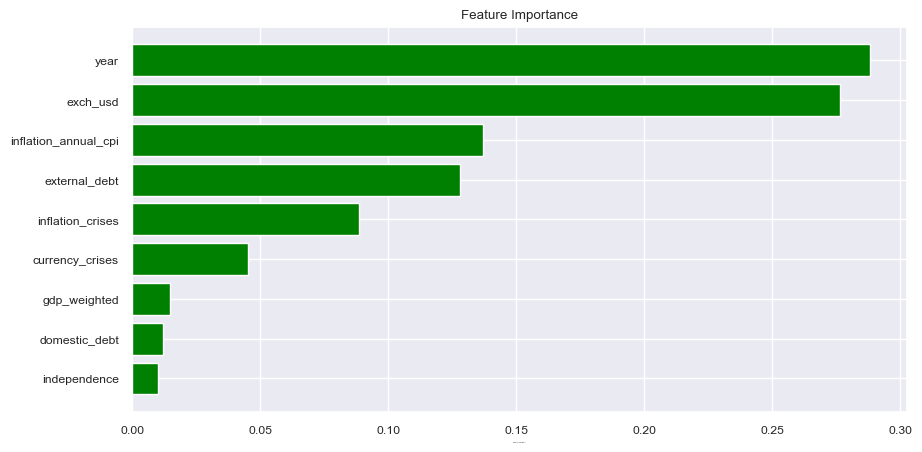

In [153]:
print(pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

importances = estimator.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Let's build classification models using Decision Tree Classifier, Bagging Classifier, and Random Forest Classifier

### Importing libraries and preparing data

In [154]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# Libraries for model tuning and evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [155]:
data_2 = df
X = data_2.drop('systemic_crisis', axis=1)
y = data_2['systemic_crisis']
# random state controls shuffling before applying split; shuffling is default; stratify allows shuffle by class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(741, 9) (318, 9)


In [156]:
data=df.copy()
X = data.drop('systemic_crisis', axis=1)
y = data['systemic_crisis'].astype('int64')
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(741, 9) (318, 9)


### Prepare functions

Function to calculate different metric scores of the model - Accuracy, Recall, Precision AND F1

In [157]:
def get_metrics_score(model, flag=True):
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    # Recall = minimizes false negatives
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    # Precision = minimizes false positives
    
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1, test_f1))
        
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returns the list with train and test scores

Function to make confusion matrix

In [158]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
        columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
        cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
        cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
        zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Decision Tree

In [159]:
# Fit the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

Accuracy on training set :  1.0
Accuracy on test set :  0.9245283018867925
Recall on training set :  1.0
Recall on test set :  0.4482758620689655
Precision on training set :  1.0
Precision on test set :  0.6190476190476191
F1-Score on training set :  1.0
F1-Score on test set :  0.52


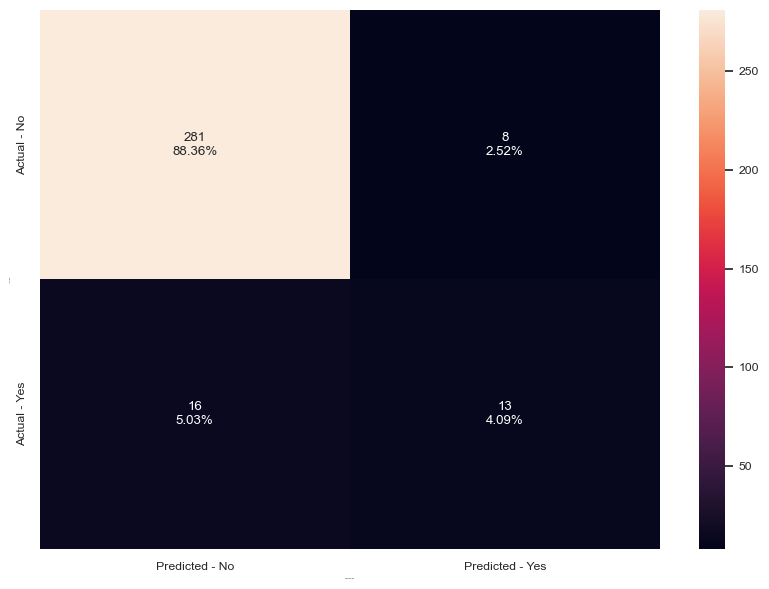

In [160]:
# Calculate metrics
get_metrics_score(d_tree)
# Create the confusion matrix
make_confusion_matrix(d_tree,y_test)

### Random Forest

In [161]:
# Fit the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

Accuracy on training set :  1.0
Accuracy on test set :  0.9308176100628931
Recall on training set :  1.0
Recall on test set :  0.3448275862068966
Precision on training set :  1.0
Precision on test set :  0.7692307692307693
F1-Score on training set :  1.0
F1-Score on test set :  0.47619047619047616


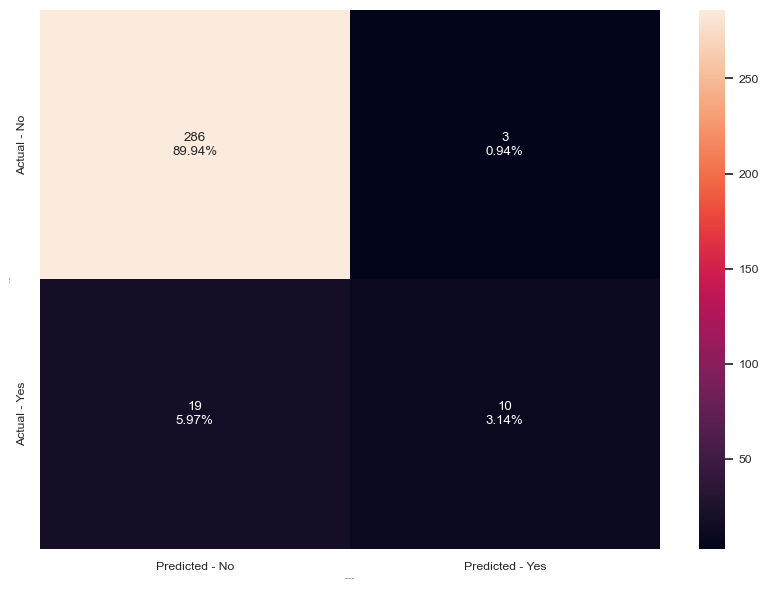

In [162]:
# Calculate metrics
get_metrics_score(rf_estimator)
# Create the confusion matrix
make_confusion_matrix(rf_estimator,y_test)

### Bagging Classifier

In [163]:
# Fit the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

BaggingClassifier(random_state=1)

Accuracy on training set :  0.9959514170040485
Accuracy on test set :  0.9371069182389937
Recall on training set :  0.9433962264150944
Recall on test set :  0.4827586206896552
Precision on training set :  1.0
Precision on test set :  0.7368421052631579
F1-Score on training set :  0.970873786407767
F1-Score on test set :  0.5833333333333334


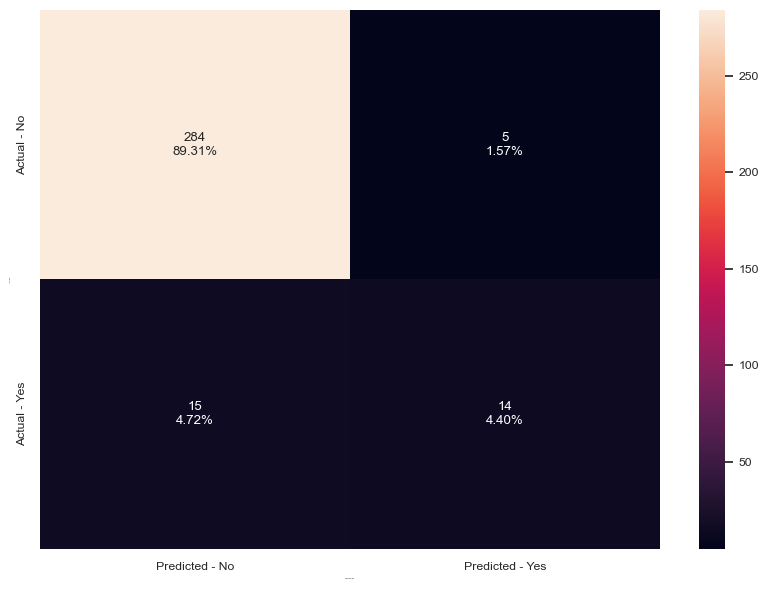

In [164]:
# Calculate metrics
get_metrics_score(bagging_classifier)
# Create the confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

### Tuned Decision Tree

In [165]:
%%time
dtree_tuned = DecisionTreeClassifier(class_weight={0:0.35,1:0.65},random_state=1)

parameters = {'max_depth': np.arange(2,10), 
              'min_samples_leaf': [5, 7, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

dtree_tuned = grid_obj.best_estimator_
dtree_tuned.fit(X_train, y_train)

CPU times: total: 766 ms
Wall time: 4.54 s


DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=6,
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       min_samples_leaf=7, random_state=1)

Accuracy on training set :  0.9446693657219973
Accuracy on test set :  0.9276729559748428
Recall on training set :  0.7358490566037735
Recall on test set :  0.6206896551724138
Precision on training set :  0.5909090909090909
Precision on test set :  0.6
F1-Score on training set :  0.6554621848739496
F1-Score on test set :  0.6101694915254238


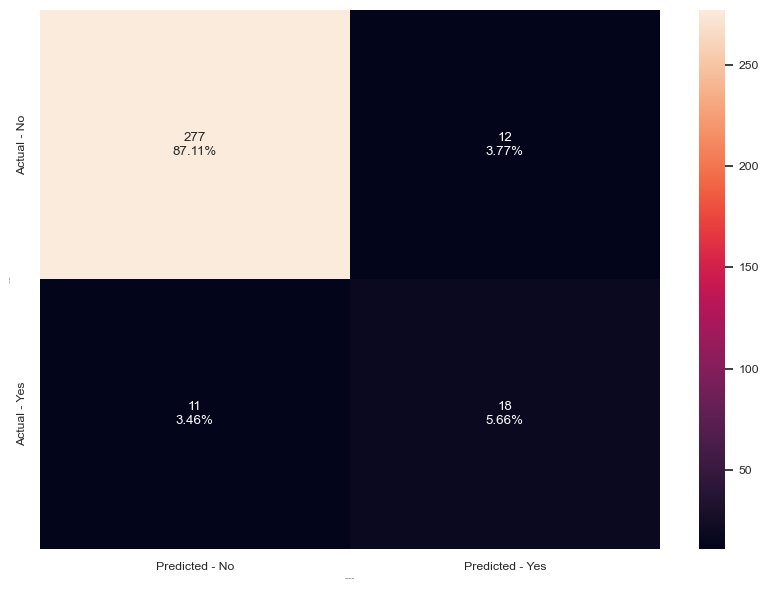

In [166]:
get_metrics_score(dtree_tuned)
make_confusion_matrix(dtree_tuned, y_test)

### Tuned Bagging Classifier

In [167]:
%%time
bagging_tuned = BaggingClassifier(random_state=1)

parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

bagging_tuned = grid_obj.best_estimator_

bagging_tuned.fit(X_train, y_train)

CPU times: total: 4.44 s
Wall time: 25.2 s


BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=30,
                  random_state=1)

Accuracy on training set :  0.9959514170040485
Accuracy on test set :  0.9308176100628931
Recall on training set :  0.9433962264150944
Recall on test set :  0.3793103448275862
Precision on training set :  1.0
Precision on test set :  0.7333333333333333
F1-Score on training set :  0.970873786407767
F1-Score on test set :  0.5


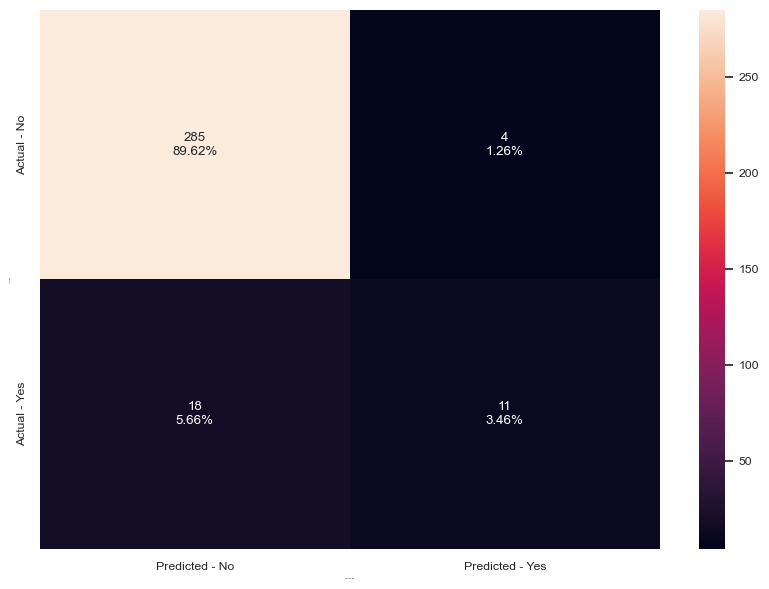

In [168]:
get_metrics_score(bagging_tuned)
make_confusion_matrix(bagging_tuned,y_test)

### Tuned Random Forest

In [169]:
# rf_tuned = RandomForestClassifier(class_weight={0:0.35,1:0.65},random_state=1)

# parameters = {  
#                 'max_depth': list(np.arange(3,10,1)),
#                 'max_features': np.arange(0.6,1.1,0.1),
#                 'max_samples': np.arange(0.7,1.1,0.1),
#                 'min_samples_split': np.arange(2, 20, 5),
#                 'n_estimators': np.arange(30,160,20),
#                 'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
# }


# # Type of scoring used to compare parameter combinations
# scorer = metrics.make_scorer(metrics.recall_score)

# # Run the grid search
# grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the clf to the best combination of parameters
# rf_tuned = grid_obj.best_estimator_

# # Fit the best algorithm to the data. 
# rf_tuned.fit(X_train, y_train)

In [170]:
# #Calculating different metrics
# get_metrics_score(rf_tuned)
# #Creating confusion matrix
# make_confusion_matrix(rf_tuned,y_test)

### Comparing Supervised ML Classification Models

In [171]:
# Identify the models to compare
models = [d_tree, dtree_tuned, rf_estimator, bagging_classifier, bagging_tuned]

# Define empty lists to add results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# Loop through all identified models to get the metrics score (i.e., Accuracy, Recall, Precision, and F1)
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [173]:
comparison_frame = pd.DataFrame({
    'Model': ['Decision Tree', 'Tuned Decision Tree', 'Random Forest', 'Bagging Classifier', 'Tuned Bagging Classifier'],
    'Train_Accuracy': acc_train,
    'Test_Accuracy': acc_test, 
    'Train_Recall': recall_train,
    'Test_Recall': recall_test,
    'Train_Precision': precision_train,
    'Test_Precision': precision_test,
    'F1_Train': f1_train,
    'F1_Test': f1_test,
})

#Sort models in decreasing order of test recall
comparison_frame.sort_values(by='F1_Test', ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,F1_Train,F1_Test
1,Tuned Decision Tree,0.944669,0.927673,0.735849,0.620690,0.590909,0.600000,0.655462,0.610169
3,Bagging Classifier,0.995951,0.937107,0.943396,0.482759,1.000000,0.736842,0.970874,0.583333
0,Decision Tree,1.000000,0.924528,1.000000,0.448276,1.000000,0.619048,1.000000,0.520000
4,Tuned Bagging Classifier,0.995951,0.930818,0.943396,0.379310,1.000000,0.733333,0.970874,0.500000
2,Random Forest,1.000000,0.930818,1.000000,0.344828,1.000000,0.769231,1.000000,0.476190


### Feature Importance for Selected Model

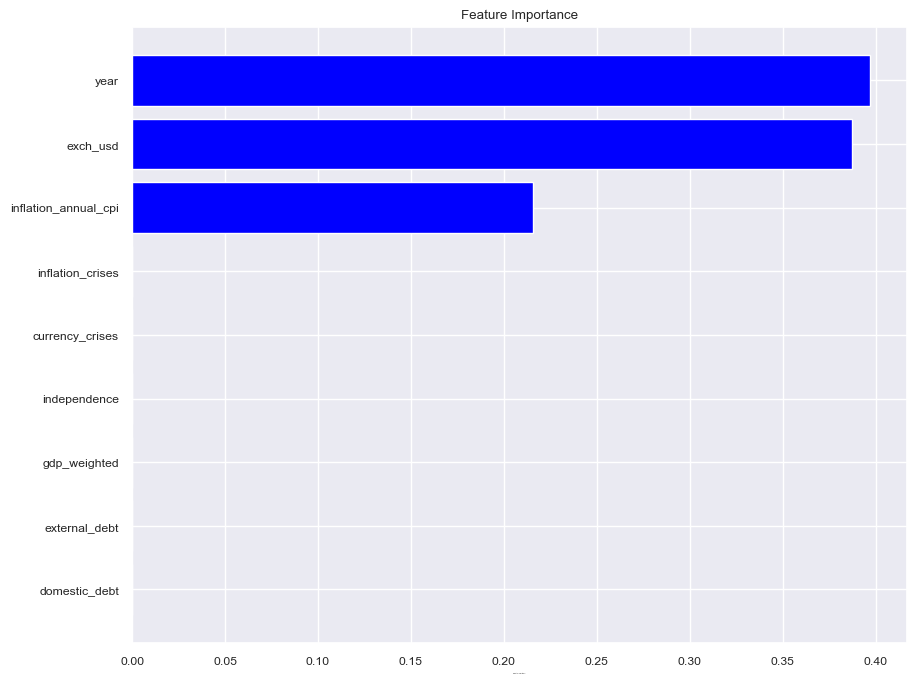

                      Relative Importance
year                             0.397039
exch_usd                         0.387093
inflation_annual_cpi             0.215868
domestic_debt                    0.000000
external_debt                    0.000000
gdp_weighted                     0.000000
independence                     0.000000
currency_crises                  0.000000
inflation_crises                 0.000000


In [174]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Relative Importance"], index = X_train.columns).sort_values(by = 'Relative Importance', ascending = False))

### Result

I will be comparing models using F1 Test since I need to find the most balanced model and this is the best test for this goal.

We can see that **Tuned Decision Tree is the best model** for this dataset we have seen so far, scoring 0.61 on F1 test.

## Boosting Models

In [175]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

### AdaBoost

In [176]:
%%time

adaboost = AdaBoostClassifier(random_state=1)
adaboost.fit(X_train,y_train)

CPU times: total: 15.6 ms
Wall time: 106 ms


AdaBoostClassifier(random_state=1)

Accuracy on training set :  0.9473684210526315
Accuracy on test set :  0.9213836477987422
Recall on training set :  0.37735849056603776
Recall on test set :  0.2413793103448276
Precision on training set :  0.7692307692307693
Precision on test set :  0.7
F1-Score on training set :  0.5063291139240507
F1-Score on test set :  0.358974358974359


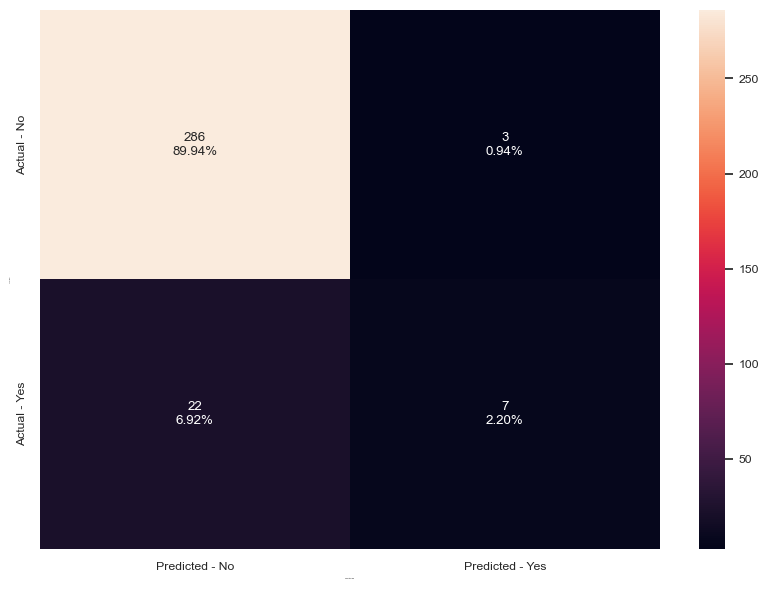

In [177]:
get_metrics_score(adaboost)
make_confusion_matrix(adaboost,y_test)

### Tuned Adaboost

In [178]:
%%time

adaboost_tuned = AdaBoostClassifier(random_state=1)

parameters = {'n_estimators': np.arange(10,100,10),                
              'learning_rate': [1, 0.1, 0.5, 0.01],                
              }

scorer = metrics.make_scorer(metrics.r2_score)

grid_obj = GridSearchCV(adaboost_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

adaboost_tuned = grid_obj.best_estimator_
 
adaboost_tuned.fit(X_train, y_train)

CPU times: total: 2.61 s
Wall time: 16.6 s


AdaBoostClassifier(learning_rate=1, n_estimators=30, random_state=1)

Accuracy on training set :  0.9433198380566802
Accuracy on test set :  0.9276729559748428
Recall on training set :  0.3018867924528302
Recall on test set :  0.3448275862068966
Precision on training set :  0.7619047619047619
Precision on test set :  0.7142857142857143
F1-Score on training set :  0.43243243243243246
F1-Score on test set :  0.46511627906976755


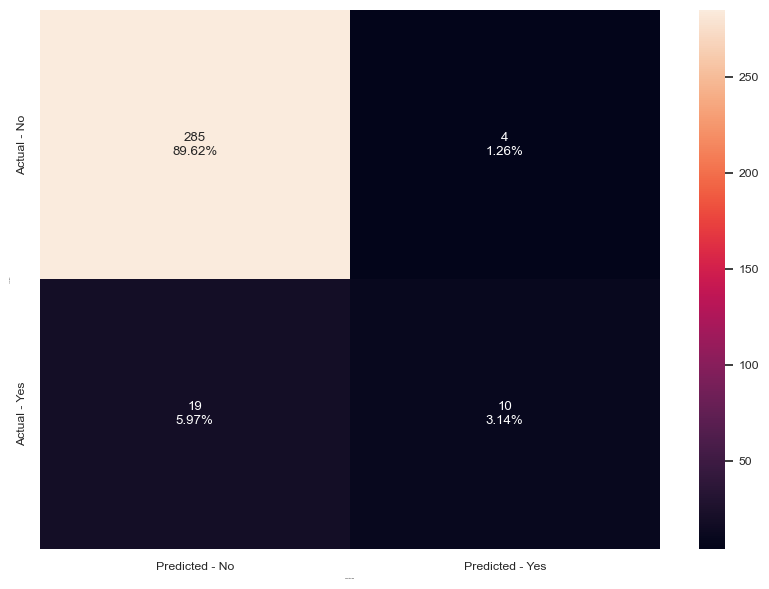

In [179]:
get_metrics_score(adaboost_tuned)
make_confusion_matrix(adaboost_tuned,y_test)

### Gradient Boosting

In [180]:
%%time

gradient_boost=GradientBoostingClassifier(random_state=1)
gradient_boost.fit(X_train,y_train)

CPU times: total: 46.9 ms
Wall time: 152 ms


GradientBoostingClassifier(random_state=1)

Accuracy on training set :  0.9892037786774629
Accuracy on test set :  0.9308176100628931
Recall on training set :  0.8490566037735849
Recall on test set :  0.3103448275862069
Precision on training set :  1.0
Precision on test set :  0.8181818181818182
F1-Score on training set :  0.9183673469387755
F1-Score on test set :  0.45000000000000007


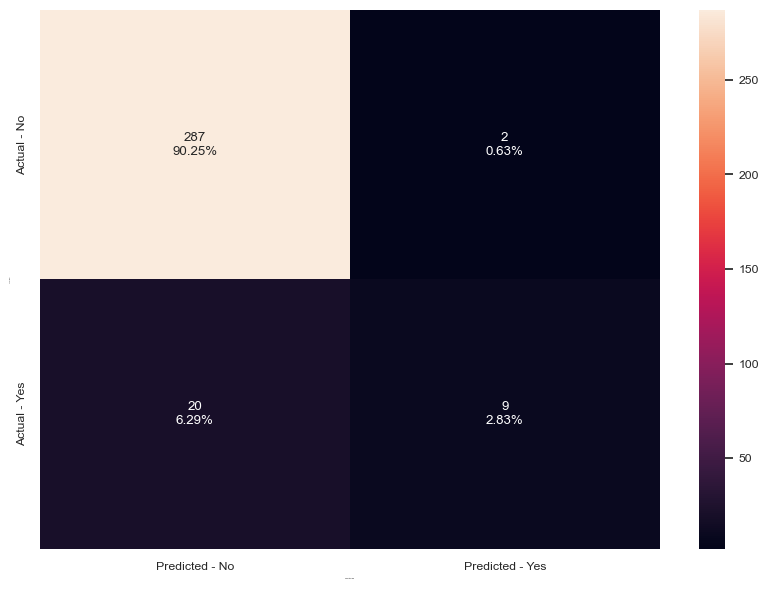

In [181]:
get_metrics_score(gradient_boost)
make_confusion_matrix(gradient_boost,y_test)

### Tuned Gradient Boosting

In [182]:
%%time

# Create the initial model
base_estimator = DecisionTreeClassifier(max_depth=1)

gb_tuned = GradientBoostingClassifier(init=base_estimator,random_state=1)

parameters = {
    "n_estimators": [20,50,100,150],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(gb_tuned, parameters, scoring=acc_scorer,cv=5)

grid_obj = grid_obj.fit(X_train, y_train)

gb_tuned = grid_obj.best_estimator_

gb_tuned.fit(X_train, y_train)

CPU times: total: 4.45 s
Wall time: 25 s


GradientBoostingClassifier(init=DecisionTreeClassifier(max_depth=1),
                           max_features=0.8, n_estimators=150, random_state=1,
                           subsample=0.8)

Accuracy on training set :  0.9986504723346828
Accuracy on test set :  0.9276729559748428
Recall on training set :  0.9811320754716981
Recall on test set :  0.3103448275862069
Precision on training set :  1.0
Precision on test set :  0.75
F1-Score on training set :  0.9904761904761905
F1-Score on test set :  0.4390243902439025


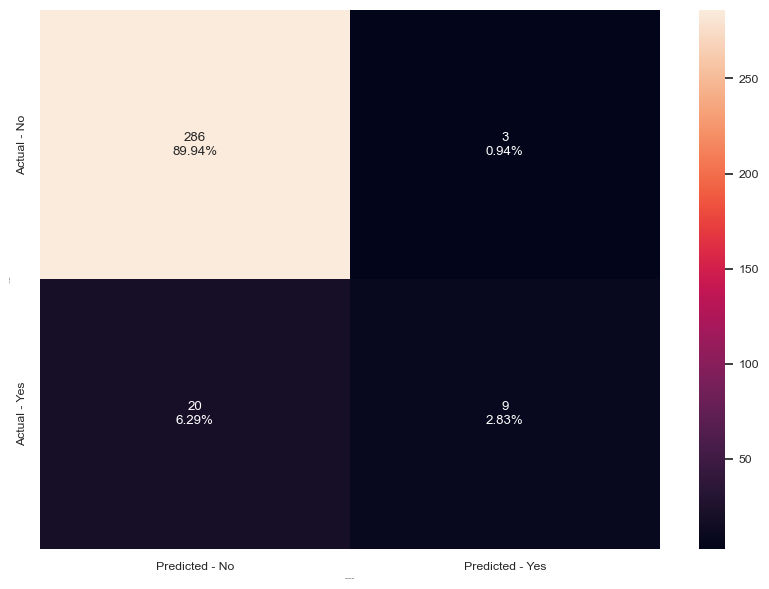

In [183]:
get_metrics_score(gb_tuned)
make_confusion_matrix(gb_tuned,y_test)

### XGBoost

In [184]:
%pip install xgboost
from xgboost import XGBClassifier

Note: you may need to restart the kernel to use updated packages.


In [185]:
%%time

xgb = XGBClassifier(random_state=1, eval_metric='logloss')
xgb.fit(X_train,y_train)

CPU times: total: 234 ms
Wall time: 76.5 ms


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

Accuracy on training set :  1.0
Accuracy on test set :  0.949685534591195
Recall on training set :  1.0
Recall on test set :  0.5517241379310345
Precision on training set :  1.0
Precision on test set :  0.8421052631578947
F1-Score on training set :  1.0
F1-Score on test set :  0.6666666666666666


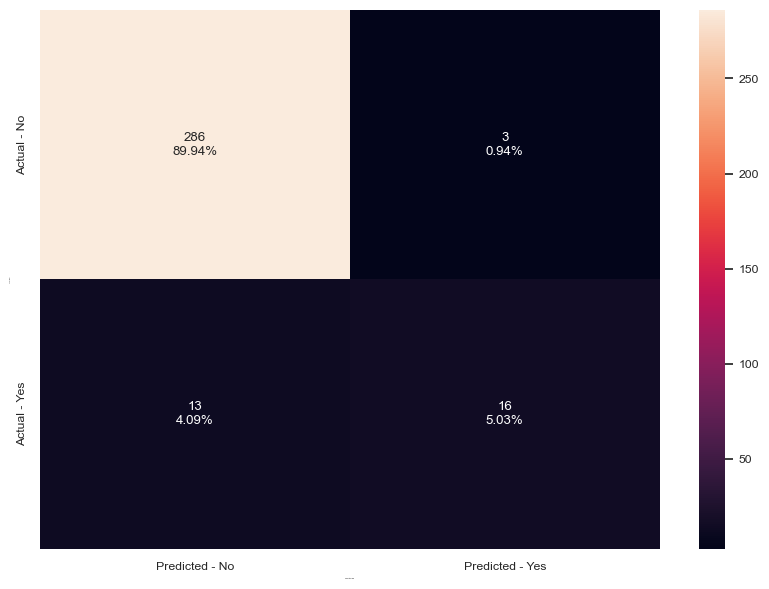

In [186]:
#Calculating different metrics
get_metrics_score(xgb)
#Creating confusion matrix
make_confusion_matrix(xgb,y_test)

### Tuned XGBoost

In [187]:
%%time

xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05,0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

xgb_tuned = grid_obj.best_estimator_

xgb_tuned.fit(X_train, y_train)

CPU times: total: 6min 44s
Wall time: 1min 24s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

Accuracy on training set :  0.9946018893387314
Accuracy on test set :  0.9308176100628931
Recall on training set :  1.0
Recall on test set :  0.5862068965517241
Precision on training set :  0.9298245614035088
Precision on test set :  0.6296296296296297
F1-Score on training set :  0.9636363636363636
F1-Score on test set :  0.6071428571428571


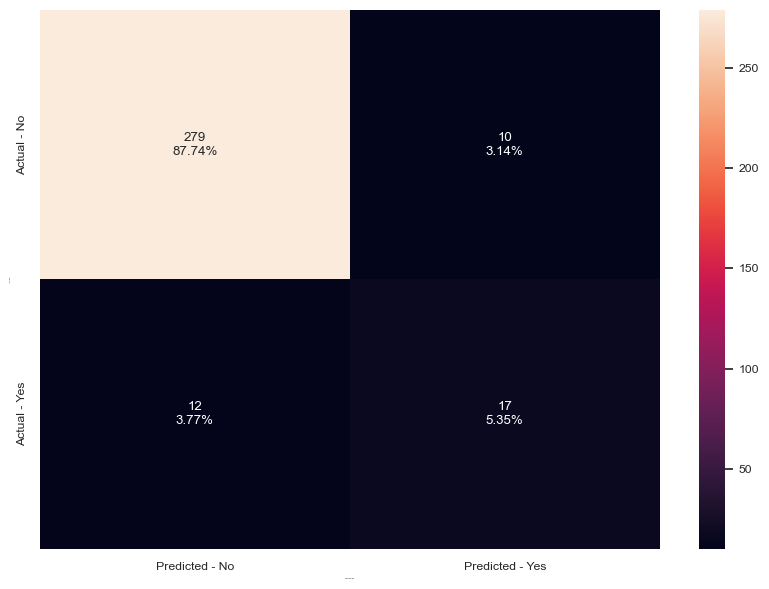

In [188]:
#Calculating different metrics
get_metrics_score(xgb_tuned)
#Creating confusion matrix
make_confusion_matrix(xgb_tuned,y_test)

### Boosting Model Comparisons

In [189]:
# defining list of models
models = [adaboost, adaboost_tuned, gradient_boost, gb_tuned, xgb, xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1_train.append(np.round(j[6],2))
    f1_test.append(np.round(j[7],2))

In [190]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost','AdaBoost Tuned', 'Gradient Boost','Gradient Boost Tuned',
                                          'XGBoost','XGBoost Tuned'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test,
                                          'Train_F1': f1_train,
                                          'Test_F1': f1_test}) 

comparison_frame.sort_values(by='Test_F1',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
4,XGBoost,1.00,0.95,1.00,0.55,1.00,0.84,1.00,0.67
5,XGBoost Tuned,0.99,0.93,1.00,0.59,0.93,0.63,0.96,0.61
1,AdaBoost Tuned,0.94,0.93,0.30,0.34,0.76,0.71,0.43,0.47
2,Gradient Boost,0.99,0.93,0.85,0.31,1.00,0.82,0.92,0.45
3,Gradient Boost Tuned,1.00,0.93,0.98,0.31,1.00,0.75,0.99,0.44
0,AdaBoost,0.95,0.92,0.38,0.24,0.77,0.70,0.51,0.36


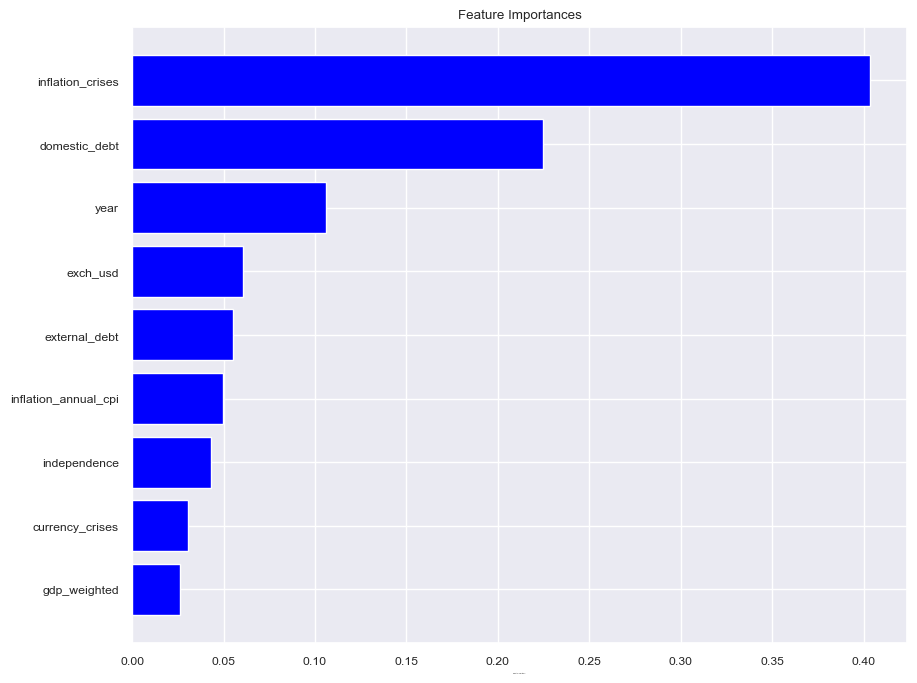

In [191]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Based on F1 test, the best not overfitting method is **Tuned AdaBoost** scoring 0.47 on F1 Test

### Result

*I will be comparing models using F1 Test since I need to find the most balanced model and this is the best test for my dataset.*

We can see that **Tuned Decision Tree is the best model** for this dataset that isn't overfitting we have seen so far, scoring 0.61 on F1 Test. So, I will be using Tuned Decision Tree as the main algorithm for this dataset.